In [1]:
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import numpy as np
import os
import shutil
import time
import math

from PIL import Image
import numpy as np
import sys

%matplotlib inline

print("mpl backend: ", plt.get_backend())

mpl backend:  module://ipykernel.pylab.backend_inline


In [167]:
def make_data():
    data = []
    with open("out_train_0_001.txt") as f:
        for line in f:
            bce, bce_mean, _, prec1, prec1_mean, _, prec5, prec5_mean, = line.split()[9:]
            data.append([float(bce_mean.replace('(', '').replace(')', '')), 
                         float(bce.replace('(', '').replace(')', '')), 
                         float(prec1_mean.replace('(', '').replace(')', '')),
                         float(prec1.replace('(', '').replace(')', '')),
                         float(prec5_mean.replace('(', '').replace(')', '')),
                         float(prec5.replace('(', '').replace(')', ''))])
    data = np.array(data)
    return data

In [168]:
def make_data_val():
    data_val = []
    with open("out_val_0_001.txt") as f:
        for line in f:
            if len(line.split()) < 12:
                continue
            loss, loss_mean, _, prec1, prec1_mean, _, prec5, prec5_mean, = line.split()[6:]
            data_val.append([float(loss_mean.replace('(', '').replace(')', '')),
                             float(loss.replace('(', '').replace(')', '')),
                             float(prec1_mean.replace('(', '').replace(')', '')),
                             float(prec1.replace('(', '').replace(')', '')),
                             float(prec5_mean.replace('(', '').replace(')', '')),
                             float(prec5.replace('(', '').replace(')', ''))])
    data_val = np.array(data_val)
    return data_val

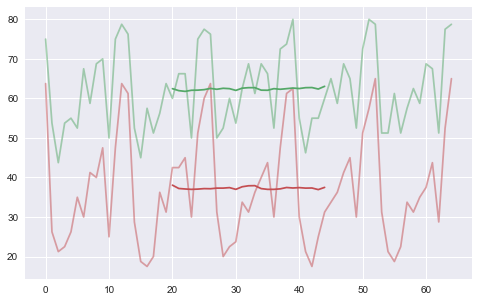

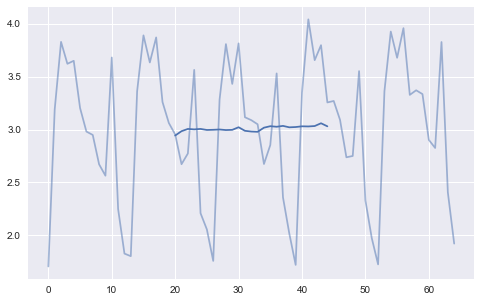

In [178]:
data = make_data_val()
window=20
r = running_mean(data, window)
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(r))+window, r[:, 3], c='r')
plt.plot(data[:, 3], c='r', alpha=0.5)
plt.plot(np.arange(len(r))+window, r[:, 5], c='g')
plt.plot(data[:, 5], c='g', alpha=0.5)
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(r))+window, r[:, 1])
plt.plot(data[:, 1], c='b', alpha=0.5)
plt.show()

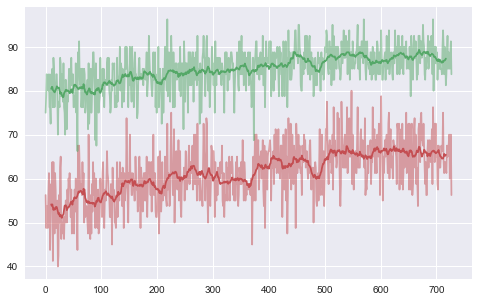

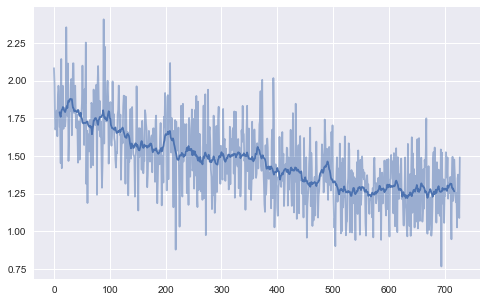

In [177]:
data = make_data()
window=10
r = running_mean(data, window)
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(r))+window, r[:, 3], c='r')
plt.plot(data[:, 3], c='r', alpha=0.5)
plt.plot(np.arange(len(r))+window, r[:, 5], c='g')
plt.plot(data[:, 5], c='g', alpha=0.5)
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(r))+window, r[:, 1])
plt.plot(data[:, 1], c='b', alpha=0.5)
plt.show()

In [22]:
def running_mean(d, window=10):
    res = []
    for i in range(window, d.shape[0]-window):
        res.append(np.mean(d[i-window:i+window], axis=0))
    return np.array(res)